In [2]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np

torch.manual_seed(446)
np.random.seed(446)


## Tensors and relation to numpy

In [11]:
# create tensors in a similar way to numpy and arrays
x_numpy = np.array([0.1, 0.22, 0.3])
x_torch = torch.tensor([0.1, 0.2, 0.3])
print('x_numpy, x_tensor')
print(x_numpy, x_torch)
print()

# to and from numpy, pytorch
print('to and from numpy and pytorch')
print(torch.from_numpy(x_numpy), x_torch.numpy())
print()

# we can do basic operations like +-*/
y_numpy = np.array([3, 4, 5.])
y_torch = torch.tensor([3, 4, 5.])
print('x+y')
print(x_numpy + y_numpy, x_torch + y_torch)
print()

# many functions that are in numpy sre also in pytorch
print('norm')
print(np.linalg.norm(x_numpy), torch.norm(x_torch))
print()

# to apply an operations along a dimension,
# we use the dim keyword argment instead of axis
print('mean along the 0th dimension')
x_numpy = np.array([[1,2], [3,4]])
x_tensor = torch.tensor([[1,2], [3,4]])
print(np.mean(x_numpy, axis=0), torch.mean(x_torch, dim=0))

x_numpy, x_tensor
[0.1  0.22 0.3 ] tensor([0.1000, 0.2000, 0.3000])

to and from numpy and pytorch
tensor([0.1000, 0.2200, 0.3000], dtype=torch.float64) [0.1 0.2 0.3]

x+y
[3.1  4.22 5.3 ] tensor([3.1000, 4.2000, 5.3000])

norm
0.38522720568516444 tensor(0.3742)

mean along the 0th dimension
[2. 3.] tensor(0.2000)


## Tensor.view
We can reshape tensors similarly to numpy.reshape()

It can automatically calculate the correct dimension if a -1 is passed in.This is useful if we are working with batch size is unknown.

In [17]:
# "MNIST"
N, C, W, H = 10000, 3, 28, 28
X = torch.randn(N, C, W, H)
print(X.shape)
print(X.view(N, C, 784).shape)
print(X.view(-1, C, 784).shape)

torch.Size([10000, 3, 28, 28])
torch.Size([10000, 3, 784])
torch.Size([10000, 3, 784])


## Computation graphs

In [20]:
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
c = a + b
d = b + 1
e = c * d
print('c', c)
print('d', d)
print('e', e)

c tensor(3., grad_fn=<AddBackward0>)
d tensor(2., grad_fn=<AddBackward0>)
e tensor(6., grad_fn=<MulBackward0>)


## CUDA SEMANTICS
It's easy cupy tensor from cpu to gpu from gpu to cpu.

In [25]:
cpu = torch.device("cpu")
gpu = torch.device("cuda")
x = torch.rand(10)
print(x)
x = x.to(gpu)
print(x)
x = x.to(cpu)
print(x)

tensor([0.3360, 0.0470, 0.8528, 0.8159, 0.6722, 0.1176, 0.8227, 0.3750, 0.7711,
        0.7036])
tensor([0.3360, 0.0470, 0.8528, 0.8159, 0.6722, 0.1176, 0.8227, 0.3750, 0.7711,
        0.7036], device='cuda:0')
tensor([0.3360, 0.0470, 0.8528, 0.8159, 0.6722, 0.1176, 0.8227, 0.3750, 0.7711,
        0.7036])


## PyTroch as an auto grad framework

In [26]:
def f(x):
    return (x-2)**2

def fp(x):
    return 2*(x-2)

x = torch.tensor([1.0], requires_grad=True)
y = f(x)
y.backward()

print('Analytical f\'(x):', fp(x))
print('PyTorch\'sf\'(x):', x.grad)

Analytical f'(x): tensor([-2.], grad_fn=<MulBackward0>)
PyTorch'sf'(x): tensor([-2.])


In [28]:
def g(w):
    return 2*w[0]*w[1] + w[1]*torch.cos(w[0])

def grad_g(w):
    return torch.tensor([2*w[1] - w[1]*torch.sin(w[0]), 2*w[0] + torch.cos(w[0])])

w = torch.tensor([np.pi, 1], requires_grad=True)
z = g(w)
z.backward()

print('Analytical grad g(w)', grad_g(w))
print('PyTorch\'s grad g(w)', w.grad)

Analytical grad g(w) tensor([2.0000, 5.2832])
PyTorch's grad g(w) tensor([2.0000, 5.2832])


## Using the gradients

In [38]:
x = torch.tensor([5.0], requires_grad=True)
step_size = 0.25
print('iter, \tf(x), \tf\'(x), \tf\'(x) pytorch')
for i in range(15):
    y = f(x)
    y.backward()  # compute the gradient
    print('{}, \t{:.3f}, \t{:.3f}, \t{:.3f},\t{:.3f}'.format(i, x.item(), f(x).item(), fp(x).item(), x.grad.item()))

    x.data = x.data - step_size * x.grad  # perform a GD update step
          
    # We need to zero the grad variable since the bachward()
    # call accumulates the gradient in .grad instead of overwriting
    # The detach_() if for efficiency. You do not to worry too much about it.
    x.grad.detach_()
    x.grad.zero_()

iter, 	f(x), 	f'(x), 	f'(x) pytorch
0, 	5.000, 	9.000, 	6.000,	6.000
1, 	3.500, 	2.250, 	3.000,	3.000
2, 	2.750, 	0.562, 	1.500,	1.500
3, 	2.375, 	0.141, 	0.750,	0.750
4, 	2.188, 	0.035, 	0.375,	0.375
5, 	2.094, 	0.009, 	0.188,	0.188
6, 	2.047, 	0.002, 	0.094,	0.094
7, 	2.023, 	0.001, 	0.047,	0.047
8, 	2.012, 	0.000, 	0.023,	0.023
9, 	2.006, 	0.000, 	0.012,	0.012
10, 	2.003, 	0.000, 	0.006,	0.006
11, 	2.001, 	0.000, 	0.003,	0.003
12, 	2.001, 	0.000, 	0.001,	0.001
13, 	2.000, 	0.000, 	0.001,	0.001
14, 	2.000, 	0.000, 	0.000,	0.000


## Linear Regression
Now, instead of minimizing a made-up function, lets minimize a loss function on some made-up data.

We will implement Gradient Descent in order to sovle the task of linear regression.

In [60]:
# make a simple linea dataset with some noise
# 50个样本点，2个特征值
d = 2
n = 50
X = torch.randn(n, d)
true_w = torch.tensor([[-1.0], [2.0]])
y = X @ true_w + torch.randn(n, 1) * 0.1
print('X shape', X.shape)
print('y shape', y.shape)
print('w shape', true_w.shape)


X shape torch.Size([50, 2])
y shape torch.Size([50, 1])
w shape torch.Size([2, 1])


$$\nabla_w \mathcal{L}_{RSS}(w; X) = \nabla_w\frac{1}{n} ||y - Xw||_2^2 = -\frac{2}{n}X^T(y-Xw)$$

In [61]:
# 定义rss损失函数
# define a linear model with no bias
def model(X, w):
    return X @ w

# the residual sum of squares loss function
def rss(y, y_hat):
    return torch.norm(y - y_hat)**2 / n

# analytical expression for the gradient
def grad_rss(X, y, w):
    return -2*X.t() @ (y - X @ w) / n

w = torch.tensor([[1.], [0]], requires_grad=True)
y_hat = model(X, w)

loss = rss(y, y_hat)
loss.backward()

print('计算gradient', grad_rss(X, y, w).detach().view(2).numpy())
print('pytorch gradient', w.grad.view(2).numpy())

计算gradient [ 2.7337537 -3.8884919]
pytorch gradient [ 2.7337537 -3.8884923]


In [62]:
# Linear regression using GD with automatically computed derivatives
# 使用GD和自动计算的导数进行线性回归
step_size = 0.1
print('iter, \tloss, \tw')
for i in range(20):
    y_hat = model(X, w)
    loss = rss(y, y_hat)
    
    loss.backward()  # compute the gradient of the loss
    w.data = w.data - step_size * w.grad  # do a gradient descent step
    print('{}, \t{:.2f}, \t{}'.format(i, loss.item(), w.view(2).detach().numpy()))
    
    w.grad.detach()
    w.grad.zero_()

iter, 	loss, 	w
0, 	6.61, 	[0.45324928 0.77769846]
1, 	2.88, 	[0.25240588 1.0125588 ]
2, 	2.01, 	[0.07887919 1.2013885 ]
3, 	1.41, 	[-0.07085963  1.3533686 ]
4, 	0.99, 	[-0.19992636  1.4758236 ]
5, 	0.70, 	[-0.3110618  1.5746008]
6, 	0.50, 	[-0.40666887  1.6543715 ]
7, 	0.36, 	[-0.48884836  1.7188704 ]
8, 	0.25, 	[-0.55943227  1.7710859 ]
9, 	0.18, 	[-0.62001455  1.8134109 ]
10, 	0.13, 	[-0.6719795  1.8477634]
11, 	0.10, 	[-0.716527   1.8756822]
12, 	0.07, 	[-0.75469553  1.8984028 ]
13, 	0.05, 	[-0.78738266  1.9169185 ]
14, 	0.04, 	[-0.81536305  1.9320284 ]
15, 	0.03, 	[-0.8393047  1.9443762]
16, 	0.02, 	[-0.8597829  1.9544811]
17, 	0.02, 	[-0.8772926  1.9627622]
18, 	0.02, 	[-0.8922593  1.9695585]
19, 	0.01, 	[-0.90504867  1.9751439 ]


# torch.nn.Module
`Module` is PyTorch's way of performing operations on tensors.Modules are implemented as subclasses of the `torch.nn.Module` class.All modules are callable and can be composed together to create complex functions.

[`torch.nn` docs](https://pytorch.org/docs/stable/nn.html)

Note:most of the functionality implemented for modules can be accessed in a functional form via `torch.nn.functional`, but these require you to create and manage the weight tensors yourself.

[`torch.nn.functional` docs](https://pytorch.org/docs/stable/nn.html#torch-nn-functional)

## Linear Module
The bread and butter of modules is the Linear module which does a linear transformation with a bias. It takes the input and output dimensions as parameters, and creates the weights in the object.

Unlike how we initialized our  w  manually, the Linear module automatically initializes the weights randomly. For minimizing non convex loss functions (e.g. training neural networks), initialization is important and can affect results. If training isn't working as well as expected, one thing to try is manually initializing the weights to something different from the default. PyTorch implements some common initializations in torch.nn.init.

模块的主要内容是线性模块，它可以在偏置的情况下进行线性变换。 它以输入和输出尺寸为参数，并在对象中创建权重。

与我们手动初始化w的方式不同，线性模块会自动随机地初始化权重。 为了最小化非凸损失函数（例如训练神经网络），初始化很重要并且会影响结果。 如果训练效果不如预期，则可以尝试的一件事是将权重手动初始化为与默认值不同的值。 PyTorch在torch.nn.init中实现了一些常见的初始化。

[`torch.nn.init` docs](https://pytorch.org/docs/stable/nn.html#torch-nn-init)

In [4]:
d_in = 3
d_out = 4
linear_module = nn.Linear(d_in, d_out)
example_tensor = torch.tensor([[1., 2, 3], [4, 5, 6]])
transformed = linear_module(example_tensor)

print('example_tensor', example_tensor.shape)
print('transformed', transformed.shape)
print()
print('we can see that the weights exist in the background\n')
print('weight', linear_module.weight)
print('bais', linear_module.bias)

example_tensor torch.Size([2, 3])
transformed torch.Size([2, 4])

we can see that the weights exist in the background

weight Parameter containing:
tensor([[ 0.0968,  0.1537, -0.3115],
        [-0.5393, -0.3418, -0.5293],
        [-0.3164, -0.2906,  0.4814],
        [ 0.3724, -0.0847,  0.3947]], requires_grad=True)
bais Parameter containing:
tensor([-0.0275,  0.2247, -0.3916,  0.5080], requires_grad=True)


## activational functions 
PyTorch implements a number of activation functions including but not limited to ReLU, tanh, and sigmoid.Since they are modules, they need to be instantiated.

In [7]:
activation_fn = nn.ReLU()
example_tensor = torch.tensor([-1.0, 1.0, 2.0])
activated = activation_fn(example_tensor)
print('eaxmple_tensor', example_tensor)
print('activated', activated)

eaxmple_tensor tensor([-1.,  1.,  2.])
activated tensor([0., 1., 2.])


## Sequentail
Many times, we want to compose Modules together.`torch.nn.Sequential` provides a good interface for composing simple modules.

In [10]:
d_in = 3
d_hidden = 4
d_out = 1
model = nn.Sequential(nn.Linear(d_in, d_hidden),
                     nn.Tanh(),
                     nn.Linear(d_hidden, d_out),
                     nn.Sigmoid())
example_tensor = torch.tensor([[1., 2, 3], [4, 5, 6]])
transformed = model(example_tensor)
print('transformed', transformed)

transformed tensor([[0.5078],
        [0.4976]], grad_fn=<SigmoidBackward>)


Note:We can get all of the parameters (of any nn.Module) with the `parameters()` method.

In [11]:
params = model.parameters()
for param in params:
    print(param)

Parameter containing:
tensor([[-0.2920, -0.0713,  0.4625],
        [ 0.1687,  0.0713, -0.4099],
        [-0.0219, -0.2541,  0.1275],
        [-0.0890, -0.5499, -0.1212]], requires_grad=True)
Parameter containing:
tensor([-0.1837,  0.4708, -0.3839, -0.5094], requires_grad=True)
Parameter containing:
tensor([[ 0.1713,  0.3758, -0.1733, -0.3311]], requires_grad=True)
Parameter containing:
tensor([-0.3267], requires_grad=True)


## Loss funcitons
PyTorch implements many common loss function including `MSELoss` and `CrossEntropyLoss`.

很多的 loss 函数都有 size_average 和 reduce 两个布尔类型的参数。因为一般损失函数都是直接计算 batch 的数据，因此返回的 loss 结果都是维度为 (batch_size, ) 的向量。

如果 reduce = False，那么 size_average 参数失效，直接返回向量形式的 loss;

如果 reduce = True，那么 loss 返回的是标量.

指定这两个参数中的任何一个都将覆盖`reduction`.

In [16]:
mse_loss_fn = nn.MSELoss()
example_input = torch.tensor([0., 0, 0])
example_target = torch.tensor([1., 2, 3])
loss = mse_loss_fn(example_input, example_target)
print(loss)

tensor(4.6667)


## torch.optim
PyTorch implements a number of gradient-based optimization methods in `torch.optim`, including Gradient Descent. At the minimum, it takes in the model parameters and a learning rate.

Optimizers do not compute the gradients for you, so you must call `backward()` yourself. You also must call the `optim.zero_grad()` function before calling `backward()` since by default PyTorch does and inplace add to the `.grad` member variable rather than overwriting it.

This does both the `detach_()` and `zero_()` calls on all tensor's `grad` variables.

[`torch.optim` docs](https://pytorch.org/docs/stable/optim.html)

PyTorch在torch.optim中实现了许多基于梯度的优化方法，包括Gradient Descent。 至少要考虑模型参数和学习率。

优化器不会为您计算梯度，因此您必须自己调用back（）。 您还必须在调用Backward（）之前调用optim.zero_grad（）函数，因为默认情况下PyTorch会在.grad成员变量中进行并就地添加而不是覆盖它。

这对所有张量的grad变量都进行了detach_（）和zero_（）调用。

In [19]:
# create a simple model
model = nn.Linear(1, 1)

# create a simple dataset
X = torch.tensor([1.])
y = torch.tensor([2.])

# define the loss function
mse_loss_fn = nn.MSELoss()

# create our optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2)  # 定义的时候传入参数

print('model params before:', model.weight)
y_hat = model(X)
loss = mse_loss_fn(y, y_hat)
optim.zero_grad()
loss.backward()
optim.step()  # 这里无需传参数
print('model params after:', model.weight)

model params before: Parameter containing:
tensor([[-0.6368]], requires_grad=True)
model params after: Parameter containing:
tensor([[-0.5685]], requires_grad=True)


# Neural Network Basics in PyTorch
造数据创建一个简单的神经网络



In [24]:
import matplotlib.pyplot as plt
import numpy as np

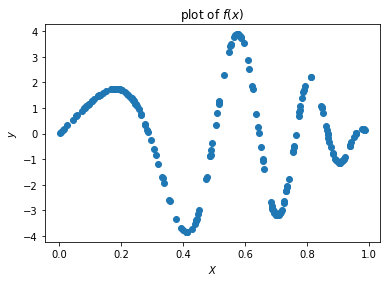

In [29]:
# 创建200个一维随机数据，y=4*sin(pi*x)*cos(6*pi**2)
d = 1
n = 200
X = torch.rand(n, d)
y = 4 * torch.sin(np.pi * X) * torch.cos(6*np.pi*X**2)

plt.scatter(X.numpy(), y.numpy())
plt.title('plot of $f(x)$')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()

In [32]:
# 创建一个三层的神经网络，在一定的epoches内迭代使用SGD优化算法求解权重
step_size = 0.05
epoches = 1000
hidden_1 = 32
hidden_2 = 32
out = 1

model = nn.Sequential(
    nn.Linear(d, hidden_1),
    nn.Tanh(),
    nn.Linear(hidden_1, hidden_2),
    nn.Tanh(),
    nn.Linear(hidden_2, out))
loss_func = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=step_size)
print('iter,\tloss')
for i in range(epoches):
    y_hat = model(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % (epoches // 10) == 0:
        print('{},\t{:.2f}'.format(i, loss))
        

iter,	loss
0,	4.04
100,	3.78
200,	3.76
300,	3.74
400,	3.71
500,	3.69
600,	3.66
700,	3.62
800,	3.55
900,	3.45


In [37]:
X_grid = torch.from_numpy(np.linspace(0,1,50).float().view(-1,d))
y_hat = model(X)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'float'

## Brief Sidenote: Momentum

There are other optimization algorithms besides stochastic gradient descent. One is a modification of SGD called momentum. We won't get into it here, but if you would like to read more [here](https://distill.pub/2017/momentum/) is a good place to start.

We only change the step size and add the momentum keyword argument to the optimizer. Notice how it reduces the training loss in fewer iterations.

In [39]:
# momentum:动态改变leaning rate
step_size = 0.05
momentum = 0.9
epoches = 1000
hidden_1 = 32
hidden_2 = 32
out = 1

model = nn.Sequential(
    nn.Linear(d, hidden_1),
    nn.Tanh(),
    nn.Linear(hidden_1, hidden_2),
    nn.Tanh(),
    nn.Linear(hidden_2, out))
loss_func = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=step_size, momentum=momentum)
print('iter,\tloss')
for i in range(epoches):
    y_hat = model(X)
    loss = loss_func(y_hat, y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % (epoches // 10) == 0:
        print('{},\t{:.2f}'.format(i, loss))

iter,	loss
0,	4.04
100,	3.43
200,	2.62
300,	0.55
400,	0.22
500,	0.08
600,	0.06
700,	0.05
800,	0.02
900,	0.00


## CrossEntropyLoss
So far, we have been considering regression tasks and have used the [MSELoss](https://pytorch.org/docs/stable/nn.html#torch.nn.MSELoss) module. For the homework, we will be performing a classification task and will use the cross entropy loss.

PyTorch implements a version of the cross entropy loss in one module called [CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss). Its usage is slightly different than MSE, so we will break it down here. 

- input: The first parameter to CrossEntropyLoss is the output of our network. It expects a *real valued* tensor of dimensions $(N,C)$ where $N$ is the minibatch size and $C$ is the number of classes. In our case $N=3$ and $C=2$. The values along the second dimension correspond to raw unnormalized scores for each class. The CrossEntropyLoss module does the softmax calculation for us, so we do not need to apply our own softmax to the output of our neural network.
- output: The second parameter to CrossEntropyLoss is the true label. It expects an *integer valued* tensor of dimension $(N)$. The integer at each element corresponds to the correct class. In our case, the "correct" class labels are class 0, class 1, and class 1.

Try out the loss function on three toy predictions. The true class labels are $y=[1,1,0]$. The first two examples correspond to predictions that are "correct" in that they have higher raw scores for the correct class. The second example is "more confident" in the prediction, leading to a smaller loss. The last two examples are incorrect predictions with lower and higher confidence respectively.

## Learning rate schedulers

Often we do not want to use a fixed learning rate throughout all training. PyTorch offers learning rate schedulers to change the learning rate over time. Common strategies include multiplying the lr by a constant every epoch (e.g. 0.9) and halving the learning rate when the training loss flattens out.

See the [learning rate scheduler docs](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate) for usage and examples

## Convolutions
When working with images, we often want to use convolutions to extract features using convolutions. PyTorch implments this for us in the `torch.nn.Conv2d` module. It expects the input to have a specific dimension $(N, C_{in}, H_{in}, W_{in})$ where $N$ is batch size, $C_{in}$ is the number of channels the image has, and $H_{in}, W_{in}$ are the image height and width respectively.

We can modify the convolution to have different properties with the parameters:
- kernel_size
- stride
- padding

They can change the output dimension so be careful.

See the [`torch.nn.Conv2d` docs](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d) for more information.

## Useful links:
- [60 minute PyTorch Tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [PyTorch Docs](https://pytorch.org/docs/stable/index.html)
- [Lecture notes on Auto-Diff](https://courses.cs.washington.edu/courses/cse446/19wi/notes/auto-diff.pdf)




Custom Datasets, DataLoaders
===================================================
This is modified from pytorch official tutorial.
**Author**: `Sasank Chilamkurthy <https://chsasank.github.io>`_

A lot of effort in solving any machine learning problem goes in to
preparing the data. PyTorch provides many tools to make data loading
easy and hopefully, to make your code more readable. In this tutorial,
we will see how to load and preprocess/augment data from a non trivial
dataset.



Dataset class
-------------

``torch.utils.data.Dataset`` is an abstract class representing a
dataset.
Your custom dataset should inherit ``Dataset`` and override the following
methods:

-  ``__len__`` so that ``len(dataset)`` returns the size of the dataset.
-  ``__getitem__`` to support the indexing such that ``dataset[i]`` can
   be used to get $i$\ th sample

Let's create a dataset class for our face landmarks dataset. We will
read the csv in ``__init__`` but leave the reading of images to
``__getitem__``. This is memory efficient because all the images are not
stored in the memory at once but read as required.

Sample of our dataset will be a dict
``{'image': image, 'landmarks': landmarks}``. Our dataset will take an
optional argument ``transform`` so that any required processing can be
applied on the sample. We will see the usefulness of ``transform`` in the
next section.

Mixed Presision Training
===================================================
**Author**: `Chi-Liang Liu <https://liangtaiwan.github.io>`
**Ref**: https://github.com/NVIDIA/apex
Using mixed precision to train your networks can be:
- 2-4x faster
- memory-efficient
in only 3 lines of Python.

# Apex 

NVIDIA-maintained utilities to streamline mixed precision and distributed training in Pytorch. Some of the code here will be included in upstream Pytorch eventually. The intention of Apex is to make up-to-date utilities available to users as quickly as possible.

## apex.amp

Amp allows users to easily experiment with different pure and mixed precision modes.
Commonly-used default modes are chosen by
selecting an "optimization level" or ``opt_level``; each ``opt_level`` establishes a set of
properties that govern Amp's implementation of pure or mixed precision training.
Finer-grained control of how a given ``opt_level`` behaves can be achieved by passing values for
particular properties directly to ``amp.initialize``.  These manually specified values
override the defaults established by the ``opt_level``.

In [41]:
from apex import amp

# Declare model and optimizer as usual, with default (FP32) precision
model = torch.nn.Linear(10, 100).cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# Allow Amp to perform casts as required by the opt_level
model, optimizer = amp.initialize(model, optimizer, opt_level="O1")
...
# loss.backward() becomes:
with amp.scale_loss(loss, optimizer) as scaled_loss:
    scaled_loss.backward()
...

ModuleNotFoundError: No module named 'apex'